<h1>Modeling Uncertainty using Probability<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Probability" data-toc-modified-id="Probability-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Probability</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation-for-creating-probability-table" data-toc-modified-id="Data-Preparation-for-creating-probability-table-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preparation for creating probability table</a></span></li><li><span><a href="#Joint-Probability-Table" data-toc-modified-id="Joint-Probability-Table-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Joint Probability Table</a></span></li><li><span><a href="#Conditional-Probability-Tables" data-toc-modified-id="Conditional-Probability-Tables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conditional Probability Tables</a></span></li></ul></li><li><span><a href="#Discrete-Random-Variables" data-toc-modified-id="Discrete-Random-Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Discrete Random Variables</a></span><ul class="toc-item"><li><span><a href="#Bernoulli-distribution" data-toc-modified-id="Bernoulli-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bernoulli distribution</a></span></li><li><span><a href="#Binomial-distribution" data-toc-modified-id="Binomial-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Binomial distribution</a></span></li><li><span><a href="#Poisson-distribution" data-toc-modified-id="Poisson-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Poisson distribution</a></span></li></ul></li><li><span><a href="#Countinuous-Random-Variables" data-toc-modified-id="Countinuous-Random-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Countinuous Random Variables</a></span><ul class="toc-item"><li><span><a href="#Continuous-uniform-distribution" data-toc-modified-id="Continuous-uniform-distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Continuous uniform distribution</a></span></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Normal distribution</a></span></li><li><span><a href="#Triangular-distribution" data-toc-modified-id="Triangular-distribution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Triangular distribution</a></span></li><li><span><a href="#Gamma-distribution" data-toc-modified-id="Gamma-distribution-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gamma distribution</a></span></li></ul></li><li><span><a href="#Fitting-Data-to-Distributions" data-toc-modified-id="Fitting-Data-to-Distributions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting Data to Distributions</a></span></li></ul></div>

In [1]:
# If you use Colab Notebook, you can uncomment the following to mount your Google Drive to Colab
# After that, your colab notebook can read/write files and data in your Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# If you use Colab Notebook, please change the current directory to be the folder that you save 
# your Notebook and data folder for example, I save my Colab files and data in the following location

#%cd /content/drive/MyDrive/Colab\ Notebooks

In [3]:
# import the libraries and associated modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp

# Probability

## Data Preparation for creating probability table

In [4]:
# read the data file
NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data in csv format using pd.read_csv
del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of dataframe
print(NY_bicycle.head(),'\n') # take a look at the data again after deleting the unnamed column



    Date        Day  High_Temp_F  Low_Temp_F  Precipitation Weather  \
0  1-Apr   Saturday         46.0        37.0           0.00       N   
1  2-Apr     Sunday         62.1        41.0           0.00       N   
2  3-Apr     Monday         63.0        50.0           0.03       R   
3  4-Apr    Tuesday         51.1        46.0           1.18       R   
4  5-Apr  Wednesday         63.0        46.0           0.00       N   

   Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
0              606              1446                 1915               1430   
1             2021              3943                 4207               2862   
2             2470              4988                 5178               3689   
3              723              1913                 2279               1666   
4             2807              5276                 5711               4197   

   Total  
0   5397  
1  13033  
2  16325  
3   6581  
4  17991   



In [5]:
#Prepare data
df = pd.DataFrame(NY_bicycle[['Weather', 'High_Temp_F']]) # define a dataframe containing the two random variables of interest

# convert High_Temp_F into a categorical variable
cutbins = [45, 55, 65, 75, 85, 95] #define the edges of five bins for the column "High_Temp_F" using the function cutbins()
df['Temperature']=pd.cut(df.High_Temp_F,bins=cutbins,precision=0) # Add a new column named "Temperature" to save the categorical variable converted from 'High_Temp_F'. Using the function pd.cut() to convert continuous variables into categorical variables
df.drop('High_Temp_F',axis=1,inplace=True) # delete the origional temperature column using the function drop()
df

,Weather,Temperature
0,N,"(45, 55]"
1,N,"(55, 65]"
2,R,"(55, 65]"
3,R,"(45, 55]"
4,N,"(55, 65]"
...,...,...
209,N,"(55, 65]"
210,N,"(65, 75]"
211,R,"(55, 65]"
212,R,"(45, 55]"


*{Skip the remaining codes of this subsection. Go to Joint Probability Table directly.}*

In [6]:
# read the data file
NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data in csv format using pd.read_csv
del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of dataframe
print(NY_bicycle.head(),'\n') # take a look at the data again after deleting the unnamed column

# add a dummy column to present days of the week as numerical values
import time
NY_bicycle['WkDay']=[time.strptime(i, '%A').tm_wday for i in NY_bicycle.Day]
print(NY_bicycle.head())

    Date        Day  High_Temp_F  Low_Temp_F  Precipitation Weather  \
0  1-Apr   Saturday         46.0        37.0           0.00       N   
1  2-Apr     Sunday         62.1        41.0           0.00       N   
2  3-Apr     Monday         63.0        50.0           0.03       R   
3  4-Apr    Tuesday         51.1        46.0           1.18       R   
4  5-Apr  Wednesday         63.0        46.0           0.00       N   

   Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
0              606              1446                 1915               1430   
1             2021              3943                 4207               2862   
2             2470              4988                 5178               3689   
3              723              1913                 2279               1666   
4             2807              5276                 5711               4197   

   Total  
0   5397  
1  13033  
2  16325  
3   6581  
4  17991   

    Date        Day  Hig

In [7]:
# daily volumes at different bridges (as four columns) are reshaped as a single column. 
df = pd.melt(NY_bicycle,
             id_vars=['Weather','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            ) # use pandas.melt() to reshape the wide table into a long table

# convert High_Temp_F into a categorical variable
cutbins = [45, 55, 65, 75, 85, 95] #define the edges of five bins for the column "High_Temp_F" using the function cutbins()
df['Temperature']=pd.cut(df.High_Temp_F,
                         bins=cutbins,
                         precision=0) # Add a new column named "Temperature" to save the categorical variable converted from 'High_Temp_F'. Using the function pd.cut() to convert continuous variables into categorical variables
df.drop('High_Temp_F',axis=1,inplace=True) # delete the origional temperature column using the function drop()

# Create a new categorical column to indicate the bridge name
df.columns=['Weather','Bridge','Count','Temperature']
df


,Weather,Bridge,Count,Temperature
0,N,Brooklyn_Bridge,606,"(45, 55]"
1,N,Brooklyn_Bridge,2021,"(55, 65]"
2,R,Brooklyn_Bridge,2470,"(55, 65]"
3,R,Brooklyn_Bridge,723,"(45, 55]"
4,N,Brooklyn_Bridge,2807,"(55, 65]"
...,...,...,...,...
851,N,Queensboro_Bridge,5181,"(55, 65]"
852,N,Queensboro_Bridge,4069,"(65, 75]"
853,R,Queensboro_Bridge,965,"(55, 65]"
854,R,Queensboro_Bridge,2924,"(45, 55]"


In [8]:
# daily volumes at different bridges (as four columns) are reshaped as a single column. Create a new categorical column to indicate the bridge name

# Let's create a dataframe df1 that records Weather, High_Tem, and bicycle Count at Brooklyn bridge. Then, we add a new column to indicate 'Bridge" the location
df1=pd.DataFrame(NY_bicycle[['Weather', 'High_Temp_F','Brooklyn_Bridge']]) #the 3rd column is the daily volume at Brooklyn_Bridge
df1['Bridge']='Brooklyn' # add a new column to indicate the bridge name = Brooklyn
df1.columns=['Weather', 'High_Temp_F','Volume','Bridge'] # rename the columns

# repeat the same operation for bicycle counts at other three bridges
df2=pd.DataFrame(NY_bicycle[['Weather', 'High_Temp_F','Manhattan_Bridge']])
df2['Bridge']='Manhattan'
df2.columns=['Weather', 'High_Temp_F','Volume','Bridge']

df3=pd.DataFrame(NY_bicycle[['Weather', 'High_Temp_F','Williamsburg_Bridge']])
df3['Bridge']='Williamsburg'
df3.columns=['Weather', 'High_Temp_F','Volume','Bridge']

df4=pd.DataFrame(NY_bicycle[['Weather', 'High_Temp_F','Queensboro_Bridge']])
df4['Bridge']='Queensboro'
df4.columns=['Weather', 'High_Temp_F','Volume','Bridge']

# combine the three dataframes into one dataframe using pd.concat() function
df=pd.concat([df1,df2,df3,df4], ignore_index=True)

# convert High_Temp_F into a categorical variable
cutbins = [45, 55, 65, 75, 85, 95] #define the edges of five bins for the column "High_Temp_F" using the function cutbins()
df['Temperature']=pd.cut(df.High_Temp_F,bins=cutbins,precision=0) # Add a new column named "Temperature" to save the categorical variable converted from 'High_Temp_F'. Using the function pd.cut() to convert continuous variables into categorical variables
df.drop('High_Temp_F',axis=1,inplace=True) # delete the origional temperature column using the function drop()
df



,Weather,Volume,Bridge,Temperature
0,N,606,Brooklyn,"(45, 55]"
1,N,2021,Brooklyn,"(55, 65]"
2,R,2470,Brooklyn,"(55, 65]"
3,R,723,Brooklyn,"(45, 55]"
4,N,2807,Brooklyn,"(55, 65]"
...,...,...,...,...
851,N,5181,Queensboro,"(55, 65]"
852,N,4069,Queensboro,"(65, 75]"
853,R,965,Queensboro,"(55, 65]"
854,R,2924,Queensboro,"(45, 55]"


## Joint Probability Table

In [9]:
# create the joint probability table using crosstab(normalize=True). If normalize=False, the table counts observations in each cross-cell

pt = pd.crosstab(df.Weather,df.Temperature,values=df.index, aggfunc='count',margins=True, normalize=True)
pt.map('{:.2f}'.format)

Temperature,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
Weather,,,,,,
N,0.01,0.09,0.15,0.28,0.08,0.61
R,0.03,0.07,0.10,0.09,0.03,0.32
T,0.01,0.00,0.01,0.03,0.01,0.07
All,0.05,0.17,0.27,0.39,0.12,1.00


## Conditional Probability Tables

In [10]:
# create a conditional probability using crosstab(normalize='columns')

pt=pd.crosstab(df.Weather,df.Temperature, values=df.index,aggfunc='count',normalize='columns', margins=True) # use crosstab() to create a cross-tablulation whose rows are days of the week and columns are locations
mg = pd.DataFrame(np.array([[1] * 6]), columns=pt.columns.to_list(), index=['All'])# create a row and make it the margin to be located at bottom of the table. This new column has six columns, column labels are the same as those of df, and the index of this row is "All".
pt = pd.concat([pt, mg]) # use pd.concat() to add the margin to the cross tabulation
pt.map('{:.2f}'.format)

,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
N,0.18,0.54,0.58,0.70,0.68,0.61
R,0.64,0.43,0.37,0.23,0.24,0.32
T,0.18,0.03,0.05,0.07,0.08,0.07
All,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
# create a conditional probability using crosstab(normalize='index')

pt=pd.crosstab(df.Weather,df.Temperature, values=df.index,aggfunc='count',normalize='index', margins=True)
pt['All']=1.00 # add a column named "All" and add it as the margin to to belocated at the right of the table
pt.map('{:.2f}'.format)

Temperature,"(45, 55]","(55, 65]","(65, 75]","(75, 85]","(85, 95]",All
Weather,,,,,,
N,0.02,0.15,0.25,0.45,0.13,1.00
R,0.10,0.23,0.30,0.28,0.09,1.00
T,0.14,0.07,0.21,0.43,0.14,1.00
All,0.05,0.17,0.27,0.39,0.12,1.00


# Discrete Random Variables

## Bernoulli distribution

scipy.stats.bernoulli

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

The mean of the random variable is: 0.700
The standard deviation of the random variable is: 0.458
The sample mean is: 0.699
The sample standard deviation is: 0.458


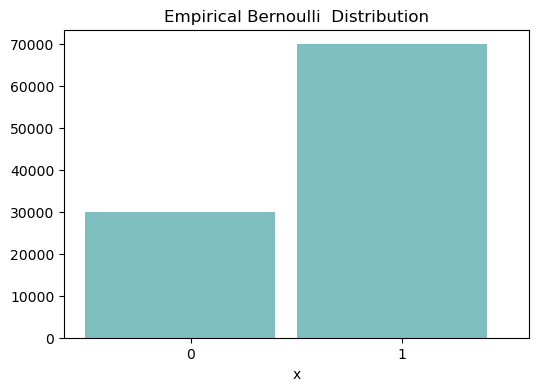

In [12]:
from scipy.stats import bernoulli

# define a Bernoulli distribution
p = 0.7
dist_bernoulli = bernoulli(p) # define an object that is a random variable following 
#print(f'The mean of the random variable is:', dist_bernoulli.mean().round(3))
print(f'The mean of the random variable is: {dist_bernoulli.mean():.3f}')

print(f'The standard deviation of the random variable is: {dist_bernoulli.std():.3f}')

# generate a random sample from the distribution
sample_size = 100_000
sample_bernoulli=dist_bernoulli.rvs(sample_size) # use distribution.rvs(n) to generate a random sample of size from the distribution 
print(f'The sample mean is: {sample_bernoulli.mean():.3f}')
print(f'The sample standard deviation is: {sample_bernoulli.std():.3f}')

## Probability Mass Function ###
plt.figure(figsize=(6,4))

# - empirical PMF
count, bin_edges, _ = plt.hist(sample_bernoulli,
                               density=False, 
                               bins=2,
                               cumulative=False, 
                               color='teal',
                               alpha=0.5,
                               width=0.45,
                               align='mid')
plt.xlabel('x')
plt.title('Empirical Bernoulli  Distribution')
plt.xticks((bin_edges[:-1] + bin_edges[1:])/2,[0,1])
plt.show()

## Binomial distribution

scipy.stats.binom

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

The mean of the random variable is: 70.000
The standard deviation of the random variable is: 4.583
sample mean is" 70.0104:.3f
sample standard deviation is: 4.590


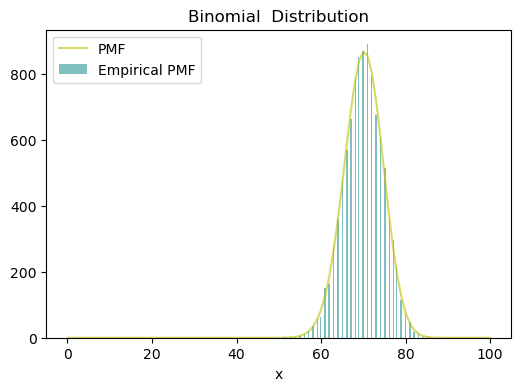

In [13]:
from scipy.stats import binom

# define a binomial distribution
n = 100 # the number of trials
p = 0.7 # the probability of success
dist_binom = binom(n,p)
print(f'The mean of the random variable is: {dist_binom.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_binom.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_binom=dist_binom.rvs(sample_size)
print(f'sample mean is" {np.mean(sample_binom)}:.3f')
print(f'sample standard deviation is: {np.std(sample_binom):.3f}')

## probability mass functions ###
plt.figure(figsize=(6,4))

# - PMF
x = range(0,n+1)
plt.plot(x,
         dist_binom.pmf(x)*sample_size,
         'y-',
         alpha=0.6)

# - empirical PMF
plt.hist(sample_binom,
         density=False, 
         bins=n+1, 
         cumulative=False, 
         color='teal',
         alpha=0.5)
plt.xlabel('x')
plt.legend(['PMF','Empirical PMF'],loc='best')
plt.title('Binomial  Distribution')
plt.show()

## Poisson distribution

scipy.stats.poisson

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

The mean of the random variable is: 5.000
The standard deviation of the random variable is: 2.236
sample mean is 4.991
sample standard deviation is 2.224


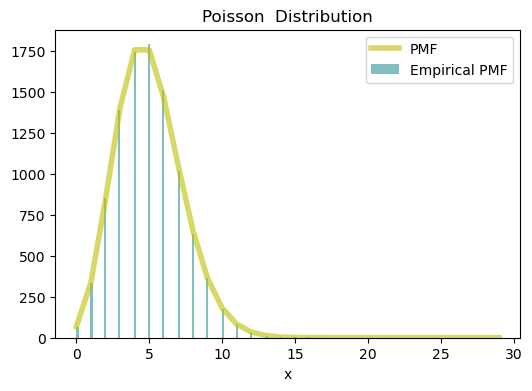

In [14]:
from scipy.stats import poisson

# define a poisson distribution
mu = 5 # mean occurance rate
dist_poisson = poisson(mu)
print(f'The mean of the random variable is: {dist_poisson.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_poisson.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_poisson=dist_poisson.rvs(sample_size)
print('sample mean is',np.mean(sample_poisson).round(3))
print('sample standard deviation is', np.std(sample_poisson).round(3))

# probability mass function
plt.figure(figsize=(6,4))

#- PMF
x=range(0,30)
plt.plot(x,
         dist_poisson.pmf(x)*sample_size,
         'y-',
         lw=4, 
         alpha=0.6)

 # - empirical PMF
plt.hist(sample_poisson,
         density=False, 
         bins=101, 
         cumulative=False, 
         color='teal',
         alpha=0.5)

plt.xlabel('x')
plt.legend(['PMF','Empirical PMF'],loc='best')
plt.title('Poisson  Distribution')
plt.show()

# Countinuous Random Variables

## Continuous uniform distribution

scipy.stats.uniform

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

The mean of the random variable is: 2.500
The standard deviation of the random variable is: 0.289
sample mean is: 2.502
sample standard deviation is: 0.290


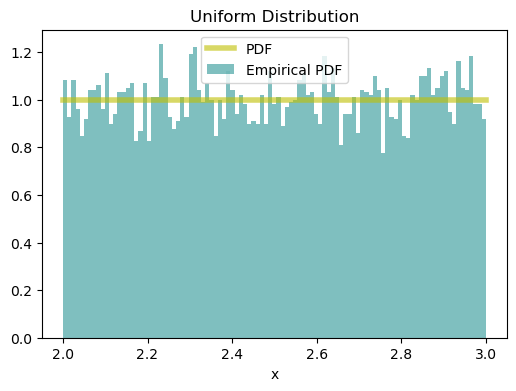

In [15]:
from scipy.stats import uniform

# define a uniform distribution
loc = 2
scale = 1
dist_uniform = uniform(loc,scale)
print(f'The mean of the random variable is: {dist_uniform.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_uniform.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_uniform=dist_uniform.rvs(sample_size)
print(f'sample mean is: {sample_uniform.mean():.3f}') #
print(f'sample standard deviation is: {sample_uniform.std():.3f}')

## probability density function ##
plt.figure(figsize=(6,4))

# -- the PDF function ---
x = np.linspace(dist_uniform.ppf(0.0001), 
                dist_uniform.ppf(0.9999), 
                100)
plt.plot(x, 
         dist_uniform.pdf(x),
         'y-', 
         lw=4, 
         alpha=0.6)

# -- the empirical PDF ---
plt.hist(sample_uniform,
         density=True, 
         bins=101, 
         cumulative=False, 
         color='teal',
         alpha=0.5)

plt.xlabel('x')
plt.legend(['PDF','Empirical PDF'],loc='best')
plt.title('Uniform Distribution')
plt.show()


## Normal distribution

Scipy.stats.norm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

The mean of the random variable is: 0.000
The standard deviation of the random variable is: 1.000
sample mean is: 0.004
sample standard deviation is: 1.003


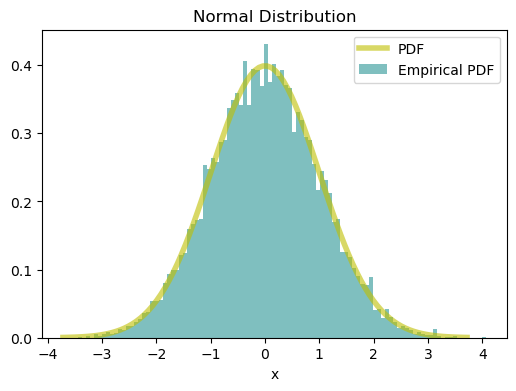

In [16]:
from scipy.stats import norm

#define a normal distribution
loc = 0 # mean
scale = 1 # standard deviation
dist_normal = norm(loc,scale) # sp.stats.norm(loc,scale) defines the normal distribution with a mean and a standard deviation
print(f'The mean of the random variable is: {dist_normal.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_normal.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_normal=dist_normal.rvs(sample_size) #distribution.rvs(sample size) generates a random sample of the given size from the defined probability distribution
print(f'sample mean is: {sample_normal.mean():.3f}') # np.mean() returns sample mean
print(f'sample standard deviation is: {sample_normal.std():.3f}') #np.var() returns sample standard deviation

## probability density function ##
plt.figure(figsize=(6,4))

# -- the pdf function ---
x = np.linspace(dist_normal.ppf(0.0001), 
                dist_normal.ppf(0.9999), 
                100)
plt.plot(x, 
         dist_normal.pdf(x),
         'y-', 
         lw=4, 
         alpha=0.6)

# -- the empirical pdf ---
plt.hist(sample_normal,
         density=True, 
         bins=101, 
         cumulative=False,
         color='teal',
         alpha=0.5) # plt.hist() genrates the histogram using the sample x. You can define the number of bins using "bins=". When density=True, the histogram approximates the probability density function. When cumulative=True, the the plot is the cumulative probability distribution

plt.xlabel('x')
plt.legend(['PDF','Empirical PDF'])
plt.title('Normal Distribution')
plt.show()



## Triangular distribution

scipy.stats.triang

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html

The mean of the random variable is: 34.000
The standard deviation of the random variable is: 5.099
sample mean is: 33.983
sample standard deviation is: 5.073


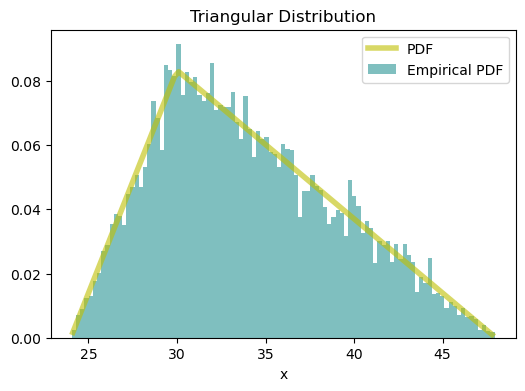

In [17]:
from scipy.stats import triang

# define a triangular distribution
c = 0.25 # the location of peak in percent c=(m-a)/(b-a)
loc = 24 # left end (loc=a)
scale = 24 # width (scale=b-a)
dist_triang = triang(c, loc, scale)
print(f'The mean of the random variable is: {dist_triang.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_triang.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_triang=dist_triang.rvs(sample_size)
print(f'sample mean is: {sample_triang.mean():.3f}')
print(f'sample standard deviation is: {sample_triang.std():.3f}')

## probability density function ##
plt.figure(figsize=(6,4))

# -- the pdf function ---
x = np.linspace(dist_triang.ppf(0.0001), 
                dist_triang.ppf(0.9999), 
                100)
plt.plot(x, 
         dist_triang.pdf(x),
         'y-', 
         lw=4, 
         alpha=0.6)

# -- the empirical pdf ---
plt.hist(sample_triang,
         density=True, 
         bins=101, 
         cumulative=False,
         color='teal',
         alpha=0.5)

plt.xlabel('x')
plt.legend(['PDF','Empirical PDF'],loc='best')
plt.title('Triangular Distribution')
plt.show()


##Exponential distribution

scipy.stats.expon

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

The mean of the random variable is: 0.200
The standard deviation of the random variable is: 0.200
sample mean is: 0.195
sample standard deviation is: 0.197


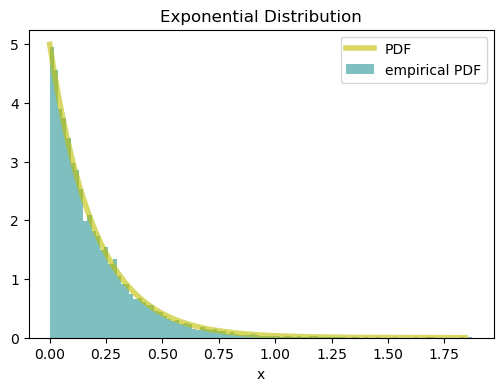

In [18]:
from scipy.stats import expon

# define an exponential distribution
loc=0 # location
scale = 0.2 # scale = 1/lambda
dist_expon = expon(loc, scale)
print(f'The mean of the random variable is: {dist_expon.mean():.3f}')
print(f'The standard deviation of the random variable is: {dist_expon.std():.3f}')

# generate a random sample from the distribution
sample_size = 10000
sample_expon=dist_expon.rvs(sample_size)
print(f'sample mean is: {sample_expon.mean():.3f}')
print(f'sample standard deviation is: {sample_expon.std():.3f}')

## probability density function ##
plt.figure(figsize=(6,4))

# -- the pdf function ---
x = np.linspace(dist_expon.ppf(0.0001), 
                dist_expon.ppf(0.9999), 
                100)
plt.plot(x, 
         dist_expon.pdf(x),
         'y-', 
         lw=4, 
         alpha=0.6)

# -- the empirical pdf ---
plt.hist(sample_expon,
         density=True, 
         bins=101, 
         cumulative=False, 
         color='teal',
         alpha=0.5)

plt.xlabel('x')
plt.legend(['PDF','empirical PDF'],loc='best')
plt.title('Exponential Distribution')
plt.show()


## Gamma distribution

scipy.stats.gamma

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

The mean of the random variable is: 6.000
The standard deviation of the random variable is: 3.464
sample mean is: 6.002
sample standard deviation is: 3.456


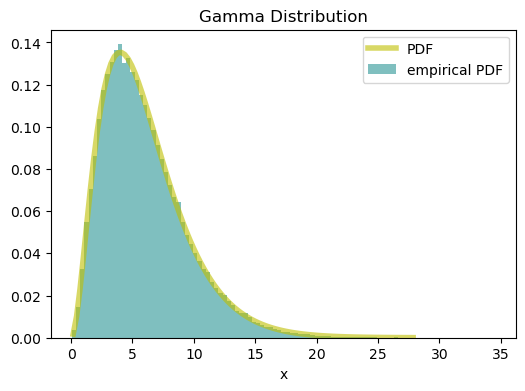

In [19]:
from scipy.stats import gamma

# define a gamma distribution
a = 3 # concentration
loc = 0
scale = 2 # scale=1/beta(rate)
dist_gamma = gamma(a, loc, scale)
print(f'The mean of the random variable is: {dist_gamma.mean():.3f}')
print(f'The standard deviation of the random variable is: { dist_gamma.std():.3f}')

# generate a random sample from the distribution
sample_size = 100000
sample_gamma=dist_gamma.rvs(sample_size)
print(f'sample mean is: {sample_gamma.mean():.3f}')
print(f'sample standard deviation is: {sample_gamma.std():.3f}')

## probability density function ##
plt.figure(figsize=(6,4))

# -- the pdf function ---
x = np.linspace(dist_gamma.ppf(0.0001), 
                dist_gamma.ppf(0.9999), 
                100)
plt.plot(x, 
         dist_gamma.pdf(x),
         'y-', 
         lw=4, 
         alpha=0.6, 
         label='norm pdf')

# -- the empirical pdf ---
plt.hist(sample_gamma,density=True, bins=101, cumulative=False, color='teal',alpha=0.5)

plt.xlabel('x')
plt.legend(['PDF','empirical PDF'],loc='best')
plt.title('Gamma Distribution')
plt.show()



# Fitting Data to Distributions

In [20]:
# isntall fitter if it's not available in your computer or Colab
# !pip install fitter

In [21]:
from fitter import Fitter # import the module Fitter from the library fitter

In [22]:
# read the datafile into colab
NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data in csv format using pd.read_csv
del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of dataframe
print(NY_bicycle.head())

    Date        Day  High_Temp_F  Low_Temp_F  Precipitation Weather  \
0  1-Apr   Saturday         46.0        37.0           0.00       N   
1  2-Apr     Sunday         62.1        41.0           0.00       N   
2  3-Apr     Monday         63.0        50.0           0.03       R   
3  4-Apr    Tuesday         51.1        46.0           1.18       R   
4  5-Apr  Wednesday         63.0        46.0           0.00       N   

   Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
0              606              1446                 1915               1430   
1             2021              3943                 4207               2862   
2             2470              4988                 5178               3689   
3              723              1913                 2279               1666   
4             2807              5276                 5711               4197   

   Total  
0   5397  
1  13033  
2  16325  
3   6581  
4  17991  


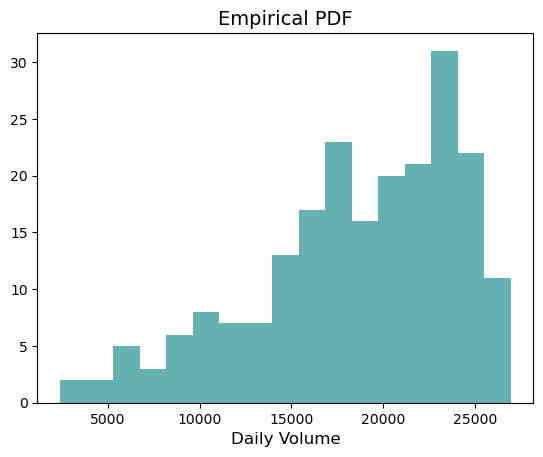

In [23]:
# Empirical probability density function of daily bicycle volume
plt.hist(NY_bicycle.Total,
         bins=17,
         density=False,
         color='teal',
         alpha=0.6)

plt.xlabel('Daily Volume',fontsize=12)
plt.title('Empirical PDF', fontsize=14)
plt.show()

In [ ]:
# fit distributions for NY_bicycle.Total
f=Fitter(NY_bicycle.Total)
f.fit()
f.summary(Nbest=3,plot=True)
f.get_best(method='sumsquare_error')

In [ ]:
# fit distributions for NY_bicycle.High_Temp_F
f=Fitter(NY_bicycle.High_Temp_F)
f.fit()
f.summary(Nbest=3,plot=True)
f.get_best(method='sumsquare_error')

2024-09-09 22:41:00.639 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-09 22:41:00.646 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.082607)
2024-09-09 22:41:00.660 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.078116)
2024-09-09 22:41:00.661 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.079532)
2024-09-09 22:41:00.663 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.12369)
2024-09-09 22:41:00.666 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.081702)
2024-09-09 22:41:00.667 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.085524)
2024-09-09 22:41:00.670 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitt

2024-09-09 22:41:01.859 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted recipinvgauss distribution with error=0.081305)
/opt/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
